In [7]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/Colab Notebooks'
!ls


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks
 BaiToanNganHang.ipynb		  Gradient_Descent.ipynb     test.csv
 ConvolutionNeuralNetwork.ipynb   LinearRegression.ipynb     train.csv
 data_linear.csv		  LinearRegressionv2.ipynb   trainLabels.csv
 DataScienceLondon.ipynb	  LogisticRegression.ipynb   w2.npz
'dataset (1).csv'		  NeuralNetwork.ipynb	    'weight logistic.npy'
'dataset (2).csv'		  Pytutorial.ipynb	     weight.npy
 DuDoanGiaNha.ipynb		  test2.jpg


[[ 1.    4.    3.  ]
 [ 1.    4.    2.5 ]
 [ 1.    4.    1.  ]
 [ 1.    4.    1.  ]
 [ 1.    5.    2.  ]
 [ 1.    5.    2.5 ]
 [ 1.    5.    0.8 ]
 [ 1.    5.    0.5 ]
 [ 1.    6.    1.8 ]
 [ 1.    6.    0.3 ]
 [ 1.    7.    1.  ]
 [ 1.    7.    0.15]
 [ 1.    7.    0.3 ]
 [ 1.    7.    0.2 ]
 [ 1.    8.    2.  ]
 [ 1.    8.    1.  ]
 [ 1.    8.    0.1 ]
 [ 1.    8.    0.15]
 [ 1.    9.    0.5 ]
 [ 1.   10.    1.  ]]
[0.71891611]
[0.718768]
[0.72630858]
[0.72571342]
[0.73081656]
[0.72276308]
[0.72016754]
[0.70741641]
[0.69899335]
[0.68591773]
[0.67431766]
[0.66271406]
[0.64963921]
[0.6397644]
[0.62628047]
[0.61787959]
[0.60469598]
[0.59742225]
[0.58501264]
[0.57856767]
[0.5672278]
[0.56139819]
[0.55128518]
[0.54594055]
[0.53710567]
[0.53218216]
[0.5245992]
[0.52007838]
[0.51366743]
[0.5095551]
[0.50420165]
[0.50050925]
[0.49607913]
[0.49280952]
[0.48916051]
[0.48629952]
[0.48329052]
[0.48080484]
[0.47830325]
[0.47614395]
[0.47403153]
[0.47214121]
[0.47031804]
[0.46863892]
[0.46702514]


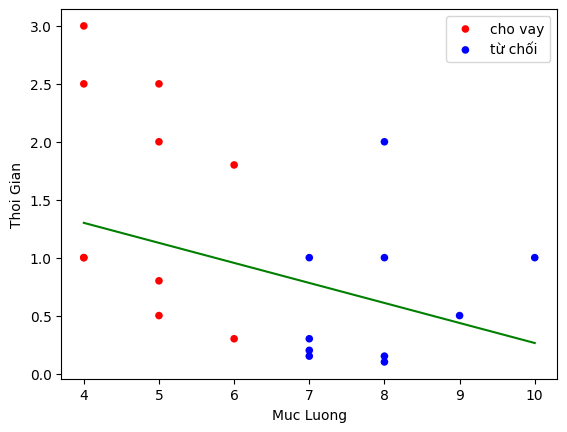

[[-7.25683504]
 [ 0.62975152]
 [ 3.6436906 ]]


In [22]:
from numpy.ma.core import multiply
from sqlalchemy.sql.expression import false
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('dataset (2).csv').values
# print (data.values)
def sigmoid(z):
  return 1/(1+np.exp(-z))

N,d = data.shape
x = data[:, 0:d-1].reshape(-1,d-1)
y = data[:,2].reshape(-1,1)
# print(x)
# print(y)

plt.scatter(x[:10,0],  x[:10,1],  c='red',  edgecolors='none', s=30, label='cho vay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('Muc Luong')
plt.ylabel('Thoi Gian')
# plt.show()

x = np.hstack((np.ones((N,1)),x))
w = np.array([0.,0.1,0.1]).reshape(-1,1)
print(x)
# print(w)

iter=1000
cost = np.zeros((iter,1))
learning_rate = 0.01
# print(cost)

for i in range (1,iter):
  n = len(y)
  y_predict =sigmoid(np.dot(x,w))
  cost[i] = -np.sum(np.multiply(y,np.log(y_predict))+np.multiply((1-y),np.log(1-y_predict)))
  cost[i]=cost[i]/n
  #Gradient
  w= w-learning_rate * np.dot(x.T,(y_predict-y))
  print(cost[i])

#Duong Phan Chia
t = 0.5
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

np.save('weight logistic.npy', w)
w = np.load('weight logistic.npy')
print(w)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-20-c895b2361549>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wg[0, 0] = logreg.intercept_


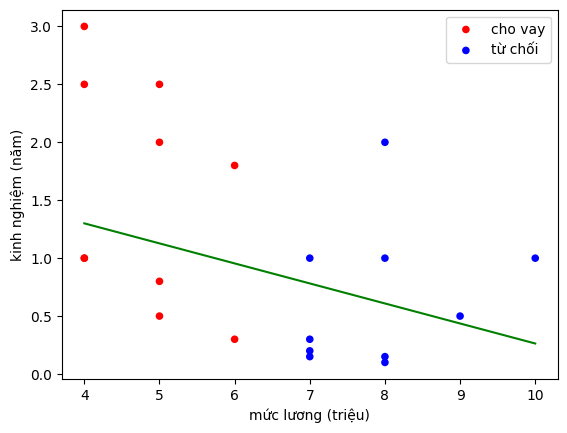

In [20]:
from sklearn.linear_model import LogisticRegression
# Load data từ file csv
data = pd.read_csv('dataset (2).csv').values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)
# Vẽ data bằng scatter
plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
# Tạo mô hình Logistic Regression và train
logreg = LogisticRegression()
logreg.fit(x, y)
# Lưu các biến của mô hình vào mảng
wg = np.zeros( (3, 1) )
wg[0, 0] = logreg.intercept_
wg[1:, 0] = logreg.coef_
# Vẽ đường phân cách
t = 0.5
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()
# Lưu các tham số dùng numpy.savez(), đỉnh dạng '.npz'
np.savez('w logistic.npz', a=logreg.intercept_, b=logreg.coef_)
# Load các tham số dùng numpy.load(), file '.npz'
k = np.load('w logistic.npz')
logreg.intercept_ = k['a']
logreg.coef_ = k['b']
